In [1]:
! pip install optbinning -q

In [2]:
import pandas as pd 
import numpy as np 
import openpyxl
import itertools
import pandas as pd
from optbinning import OptimalBinning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from optbinning import OptimalBinning
import re
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


(CVXPY) Nov 14 02:09:34 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Nov 14 02:09:34 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
pd.set_option('display.max_rows', None)    # Show all rows
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) 

In [4]:
from IPython.core.display import display, HTML

display(HTML("""<style>.container { width: 85% !important; }.code_cell .input_area {width: 100% !important;}.text_cell .input_area {width: 100% !important;}</style>"""))

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\3107909254.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 1. Data Path

In [5]:
data_path = ".\Adobe\Candidate_Nov-11\Assessment_Data.xlsx"

In [6]:
# Load the Excel file
excel_file = pd.ExcelFile(data_path)

# Display all sheet names
sheet_names = excel_file.sheet_names
print("Sheet names:", sheet_names)

Sheet names: ['Data Dictionary', 'Fraud', 'NonFraud', 'Evaluation']


## 2. Data Dictionary Load

In [7]:
df_dict = pd.read_excel(data_path, sheet_name="Data Dictionary")

In [8]:
new_cols = [x for x in str(df_dict.columns[0]).replace("'", "").replace(" ", "").split('|') if x]
df_dict.columns = ['temp']
expanded_df = df_dict['temp'].str.split('|', expand=True)
expanded_df = expanded_df.iloc[1:]
expanded_df = expanded_df.dropna(axis=1, how='all')
expanded_df = expanded_df.drop(columns=[expanded_df.columns[0], expanded_df.columns[-1]])
expanded_df.columns = new_cols
expanded_df['ColumnName'] = expanded_df['ColumnName'].str.replace(' ', '', regex=True)

In [9]:
display(expanded_df)

,ColumnName,DataType,Description
1,source_create_date,DATE,The date when the source data was created.
2,order_event_dates,ARRAY,List of dates when order events occurred.
3,final_fraud_event_date,DATE,The date of the final fraud event.
4,fiscal_yr_and_qtr_desc,STRING,Description of the fiscal year and quarter.
5,fiscal_yr_and_wk_desc,STRING,Description of the fiscal year and week.
6,user_created_date,DATE,The date when the user was created.
7,account_to_contract_date_diff,INT,Difference in days between account creation and contract date.
8,seat_status,STRING,"Status of the seat, encoded in MD5."
9,max_veda_cancel_date,DATE,The maximum VEDA cancel date.
10,order_cancel_date_diff,INT,Difference in days between order and cancel date.


In [10]:
expanded_df.head(10)

,ColumnName,DataType,Description
1,source_create_date,DATE,The date when the source data was created.
2,order_event_dates,ARRAY,List of dates when order events occurred.
3,final_fraud_event_date,DATE,The date of the final fraud event.
4,fiscal_yr_and_qtr_desc,STRING,Description of the fiscal year and quarter.
5,fiscal_yr_and_wk_desc,STRING,Description of the fiscal year and week.
6,user_created_date,DATE,The date when the user was created.
7,account_to_contract_date_diff,INT,Difference in days between account creation and contract date.
8,seat_status,STRING,"Status of the seat, encoded in MD5."
9,max_veda_cancel_date,DATE,The maximum VEDA cancel date.
10,order_cancel_date_diff,INT,Difference in days between order and cancel date.


## 3. Fraud and non Fraud data load

In [11]:
df_fraud = pd.read_excel(data_path, sheet_name="Fraud")

In [12]:
df_fraud.shape

(10000, 245)

In [13]:
df_nonfraud = pd.read_excel(data_path, sheet_name="NonFraud")

In [14]:
df_nonfraud.shape

(30200, 245)

In [15]:
df_fraud['final_fraud_event_date'].describe()

count                            10000
mean     2024-07-02 04:46:24.960000256
min                2024-02-03 00:00:00
25%                2024-05-27 00:00:00
50%                2024-06-06 00:00:00
75%                2024-08-17 00:00:00
max                2024-10-25 00:00:00
Name: final_fraud_event_date, dtype: object

In [16]:
df_nonfraud['final_fraud_event_date'].describe()

count                            30200
mean     2024-09-01 12:30:28.132450560
min                2024-08-01 00:00:00
25%                2024-08-19 00:00:00
50%                2024-09-03 00:00:00
75%                2024-09-17 00:00:00
max                2024-09-30 00:00:00
Name: final_fraud_event_date, dtype: object

In [17]:
df_fraud['fiscal_yr_and_qtr_desc'].value_counts(dropna=False)

fiscal_yr_and_qtr_desc
2024-Q3    4454
2024-Q2    3763
2024-Q4    1779
2024-Q1       4
Name: count, dtype: int64

In [18]:
df_nonfraud['fiscal_yr_and_qtr_desc'].value_counts(dropna=False)

fiscal_yr_and_qtr_desc
2024-Q4    16613
2024-Q3    13587
Name: count, dtype: int64

## 4. Evaluation Data load

In [19]:
df_eval = pd.read_excel(data_path, sheet_name="Evaluation")

In [20]:
df_eval.shape

(60300, 245)

In [21]:
print([x for x in df_eval.columns if 'fraud' in x.lower()])

['final_fraud_event_date', 'fraud_cancel_date', 'fraud_cancel_scenario', 'migrated_fraud_contract', 'migrated_fraud_delegate', 'fraud_cancels_on_invoice_domain_count', 'pct_fraud_cancel_vs_successful_by_domain', 'fraud_cancels_on_invoice_ip_count', 'pct_fraud_cancel_vs_successful_by_ip', 'bin_pct_fraud_users', 'bin_fraud_cancels']


In [23]:
# df_eval['final_fraud_event_date'].describe()

In [24]:
# df_eval['fiscal_yr_and_qtr_desc'].value_counts(dropna=False)

In [ ]:
## Keep copy avoid loading slow

In [25]:
df_fraud_copy = df_fraud.copy()
df_nonfraud_copy = df_nonfraud.copy()
df_eval_copy = df_eval.copy()

In [26]:
print([x for x in df_eval_copy.columns])

['source_create_date', 'order_event_dates', 'final_fraud_event_date', 'fiscal_yr_and_qtr_desc', 'fiscal_yr_and_wk_desc', 'user_created_date', 'account_to_contract_date_diff', 'seat_status', 'max_veda_cancel_date', 'order_cancel_date_diff', 'fraud_cancel_date', 'fraud_cancel_scenario', 'migrated_fraud_contract', 'subscription_type', 'phone_vs_web', 'jem_contract_id', 'subscription_account_guid', 'sales_document', 'dylan_order_number', 'dist_orders_by_guid', 'enrollee_id', 'email', 'emails', 'distinct_emails_per_guid', 'min_primary_email_change_dt', 'primary_email_change_to_contract_date_diff', 'user_full_name', 'first_names', 'last_names', 'org_name', 'sales_district', 'predom_usage_country', 'predom_country_sales_district_match', 'last_login_country_codes', 'last_login_ip_addresses', 'max_arkose_ip_country', 'max_arkose_ip_sales_district_match', 'arkose_ip_connection_types', 'arkose_ip_vpn', 'arkose_ip_tor', 'arkose_ip_bot', 'app_usage_last_90days_flag', 'most_used_app_last_90days', 's

In [27]:
df_fraud_copy.shape, df_nonfraud_copy.shape, df_eval_copy.shape

((10000, 245), (30200, 245), (60300, 245))

## 5. Create ID for future data merge

In [51]:
starting_value = 0
df_fraud_copy['ID'] = range(starting_value, starting_value + len(df_fraud_copy))

starting_value = 200000
df_nonfraud_copy['ID'] = range(starting_value, starting_value + len(df_nonfraud_copy))


starting_value = 500000
df_eval_copy['ID'] = range(starting_value, starting_value + len(df_eval_copy))

In [52]:
df_eval_copy.nunique()

source_create_date                                  59931
order_event_dates                                    1104
final_fraud_event_date                                413
fiscal_yr_and_qtr_desc                                 12
fiscal_yr_and_wk_desc                                 118
user_created_date                                    4251
account_to_contract_date_diff                        4335
seat_status                                             4
max_veda_cancel_date                                  288
order_cancel_date_diff                                258
fraud_cancel_date                                      47
fraud_cancel_scenario                                  64
migrated_fraud_contract                                 2
subscription_type                                       1
phone_vs_web                                            2
jem_contract_id                                     59971
subscription_account_guid                           60299
sales_document

## 6. Load binning definitions from previous Feature Explorations

In [53]:
bin_combined = pd.read_csv('bin_combined.csv')

In [54]:
bin_combined.head()

,feature,original_bin,feature_bin,average_target_rate
0,fraud_cancel_scenario,"[""Missing""]",fraud_cancel_scenario_missing,0.000000
1,fraud_cancel_scenario,"[""DCB0461300C85F31964B6AB9D2CDB1A1"", ""7C2F6FD358F6AAE240CC5BE70AE67B7C"", ""F552E142CBED032B812B659E51A20EFC"", ""6D38F64A3499C85D31074CC83E5AFE5C"", ""EB0390CF1B0F3FD4B9781FA1F80F7622"", ""E028166A0735FD584604657F62A139D6"", ""4DD169C6439FC3A753BE33DA51D16ABB"", ""1792E5B553847A6E3C5277DEBD49D0B7"", ""C8EB03F7F9950B6E754A13D0629E372E"", ""E1A51DB1DBA9EE03DE017EFF11ABB6B3"", ""ADADBB1AF7F8190B39951293E2D9E38A"", ""E5C164C3E3CEC58B27645BDB0FC26B82""]",fraud_cancel_scenario_0,0.193977
2,fraud_cancel_scenario,"[""936B49A398BD1CC633CE66A1B84F8B90"", ""9F0518672EF9CD3CC1B80AF44F7FB861"", ""504BE4CEA976B3D913F530716ADF4379"", ""19FEE3E2DBECFF3C74285242323B632A"", ""CB8B162CE5F85475DF1B8026B3E3AF49"", ""54CFF570ADC793B33D898E62A0131D18"", ""589491D630B3D2558498DD0B972D3473""]",fraud_cancel_scenario_1,0.227354
3,fraud_cancel_scenario,"[""8608475FDAC1CBF6D77796A7D25C87DC"", ""3DCA758D68B99ACF20C94E7C221A4E51"", ""2CBA608102A3BEB3D1FCB06133DFC4E6"", ""EB700F5D39E437F91E3D9FE45555228F"", ""F68B8E98C70A52BAC86303B57FBAB9E8"", ""34065F38B8BD66D21493712B348A1EF3"", ""2EB515911585F5B4E9F34ECFC90ECE83"", ""AB78909A179407732C87C8625D6EC886"", ""A97B08FCEC55634C0BDA9CEA3E6CA439"", ""387080815C2167157206EC6F30049984"", ""53A28DD7181881DD9C5A24B902E32C92"", ""41C6FD998F4EF83E785E88F1B43E9336"", ""6F350905D308C07CA38128D785F96DFA"", ""D229D1469740F47D49604B3F9D68C884"", ""A767632AB16EF7F110517343CD04E3D4""]",fraud_cancel_scenario_2,0.346652
4,fraud_cancel_scenario,"[""BF5315BB67EB6C58F57D7ADA8399A2DD"", ""54D47544C8630680AE4EFD91A48CF1A8"", ""78D1B0810619D5E84441B2AA66AEE915"", ""0E924C8F33A673517C3096BAA9A983D1"", ""99CCB8D40AA7377C6040021E880B15B7"", ""C5765C1B2E95C45720378D8F5E8A6804"", ""BFB341F188B6D38730BD330AF16AFBB1"", ""CC99251803B6512F077AFF87BA35473C"", ""D51201AD2717D0357B9437AE88C823C2"", ""D73733D2FBB5E6D1010F3EFE78FE6D79"", ""DCF6CB70F394159F4DD172B36CEC0ED7"", ""EEC3A0B35FC8EC49C7FB94A56E8F1715"", ""BB4D103145CD001E60E9C1B07868DF78"", ""8B6AC82E9BF92BF179585AD8FC1E638E"", ""AFD54A2960BD10E2B2E91AF49438563C"", ""210F1F201A1E199118F7A590B28859FB"", ""25EDD3282B7AE21C46168E0555979D88"", ""2CECB3ED200E7E107DB0B3266EBC8C81"", ""31257B5731E23620621331E495C43AA9"", ""32D50269EFB4742BF8442C8B1441702E"", ""4131C7BFAA69B33A39E77FFE7C86FE66"", ""441E4779CDA58EA04B44B01A9B1BCBD5"", ""5248AF4C84C94FAEF7009467DD08E5C6"", ""B2871E04B4F17C6CB878F828624D3A73"", ""604ACE803C2913E03F399DE0BA0F9DB2"", ""62DE5868ECE99387697F994CE4B33A29"", ""66E21F9BA05F83E471B027A1F0E8A851"", ""72CC58142CEF2DC7024DC11D273D44E3"", ""87A3C1AADF1BB1E1FD9A7014B5340399"", ""8ED06C6E4031445988A3BC7EB9C15883"", ""99E23611B730DB4BA97B57EBF05237DF"", ""9B2E78AE5BBC552C70A095CA5956698C"", ""9D608868B0C6976941804DE369D405F4"", ""62945900A00D20C04DF125D6B9FD35ED"", ""FB989CCB2AB49F1194D3D93D325D9B77""]",fraud_cancel_scenario_3,0.997316


## 7. Supporting functions

In [57]:
def clean_field(string_value):

    if pd.isna(string_value):  # Handle missing values
        return string_value
    # Step 1: Remove newline characters and single quotes
    cleaned_string = string_value.replace('\n', ' ').replace("'", "").replace("[]", "")
    
    # Step 2: Split based on whitespace to get individual elements
#     elements = re.split(r'\s+', cleaned_string)
    
    return cleaned_string

In [58]:
def clean_field_2(string_value):

    if pd.isna(string_value):  # Handle missing values
        return string_value
    # Step 1: Remove newline characters and single quotes
    cleaned_string = string_value.replace('\n', ' ').replace('"', "").replace("[", "").replace("]", "").replace("'", "")
#     cleaned_string = float(cleaned_string)
    # Step 2: Split based on whitespace to get individual elements
#     elements = re.split(r'\s+', cleaned_string)
    
    return cleaned_string

In [59]:
def assign_category(value, mapping_dict):
    # Ensure value is a string before checking for membership
    if isinstance(value, str):
        for key_elements, category in mapping_dict.items():
            if value in key_elements:
                return category
    return 'Missing_Other'  # Default category if no match is found or if value is not a string


In [60]:
def dictionary_clean(data_path):
    df_dict = pd.read_excel(data_path, sheet_name="Data Dictionary")
    new_cols = [x for x in str(df_dict.columns[0]).replace("'", "").replace(" ", "").split('|') if x]
    df_dict.columns = ['temp']
    expanded_df = df_dict['temp'].str.split('|', expand=True)
    expanded_df = expanded_df.iloc[1:]
    expanded_df = expanded_df.dropna(axis=1, how='all')
    expanded_df = expanded_df.drop(columns=[expanded_df.columns[0], expanded_df.columns[-1]])
    expanded_df.columns = new_cols
    expanded_df['ColumnName'] = expanded_df['ColumnName'].str.replace(' ', '', regex=True)

    expanded_df = expanded_df.loc[expanded_df['ColumnName']!='school_name_status_and_overall_users_on_school_ct']
    expanded_df['DataType'] = expanded_df['DataType'].str.replace(r'[^A-Za-z]', '', regex=True)
    
    return expanded_df

In [71]:
def feature_transformation_01(df, target,  expanded_df, bin_definitions):
    
    features_keep = [target]
    
    ########################################################################################################################
    ## Int, Decimal, Bool NOT do any transformation at this stage, we may consider further transform later stage 
    int_cols = expanded_df.loc[expanded_df['DataType']=='INT', 'ColumnName'].tolist()
    dec_cols = expanded_df.loc[expanded_df['DataType']=='DECIMAL', 'ColumnName'].tolist()
    bool_cols = expanded_df.loc[expanded_df['DataType']=='BOOLEAN', 'ColumnName'].tolist()
    num_cols = int_cols+dec_cols+bool_cols
    

    print(f'# Int columns: {len(int_cols)}')
    print(f'# Decimal columns: {len(dec_cols)}')
    print(f'# Bool columns: {len(bool_cols)}')
    print(f'# All Numerical columns: {len(num_cols)}')
    print(f"# Features for binning is {bin_definitions['feature'].nunique()}")
    
    features_keep = features_keep+num_cols

    ########################################################################################################################
    ## String/Array Bins
    for feature_name in bin_definitions['feature'].unique():
        
        df[feature_name] = df[feature_name].apply(lambda x: clean_field(x))
        # Filter the bin definitions for the current feature
        feature_bins = bin_definitions[bin_definitions['feature'] == feature_name]
        # Create a dictionary to map original values to renamed bins
        bin_dict = dict(zip(feature_bins['original_bin'], feature_bins['feature_bin']))
        df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
    
    binned_str_list = [ x for x in df.columns if 'Adobe_bin_' in x]
    
    features_keep += binned_str_list
    ########################################################################################################################
    ## High Cardinality Bins string type, ---> create missing or not
    
    string_cols = expanded_df.loc[expanded_df['DataType']=='STRING', 'ColumnName'].tolist()

#     cardinality_threshold_high = 500
#     high_cardinality_features = [col for col in string_cols if df.loc[df[target]!=-1, col].nunique() > cardinality_threshold_high]

#     # Display the high cardinality features
#     print(f"Features with cardinality > {cardinality_threshold_high}:")
#     print(high_cardinality_features)

    high_cardinality_features = ['jem_contract_id', 'subscription_account_guid', 'sales_document', 'dylan_order_number', 'enrollee_id', 'email', 
                                 'user_full_name', 'org_name', 'credit_card_bin', 'credit_card_short_number', 'credit_card_span', 'issuer_bank_name', 
                                 'account_holder_name', 'invoice_shipping_email', 'invoice_shipping_email_domain', 'invoice_ip_address',
                                 'invoice_pi_vat_id', 'msdfp_BrowserUserAgent', 'msdfp_Carrier', 'msdfp_DeviceId', 'postalcode', 'phonenumber', 
                                 'address_line1', 'rejected_order_event_dates', 'rejected_cc_spans', 'rejected_account_holder_names', 'cs_cases',
                                 'downloaded_apps', 'used_apps', 'arkose_evaluated_email']
    
    for a in high_cardinality_features:
        df[f'missing_{a}'] = df[a].isna().astype(int)

    missing_high_cardinality_features = [f'missing_{a}' for a in high_cardinality_features]    
    features_keep += missing_high_cardinality_features
    ########################################################################################################################
    ## Time Difference
    date_cols = expanded_df.loc[expanded_df['DataType'].isin(['DATE']), 'ColumnName'].tolist()
#     ts_cols = expanded_df.loc[expanded_df['DataType'].isin(['TIMESTAMP']), 'ColumnName'].tolist()
#     ts_cols = [x for x in ts_cols if x != 'latest_transaction_ts']

#     date_ts_cols = date_cols + ts_cols
    
# # df.loc[df[target]!=-1, date_ts_cols]
# #     missing_percentage = df[date_ts_cols].isnull().mean().sort_values(ascending=False)
#     missing_percentage = df.loc[df[target]!=-1, date_ts_cols].isnull().mean().sort_values(ascending=False)

#     date_ts_cols = [x for x in date_ts_cols if x not in missing_percentage[missing_percentage>0.96].index.tolist()]
    
    
#     date_ts_cols = [x for x in date_ts_cols if x!='source_create_date']
    date_ts_cols = ['final_fraud_event_date', 'user_created_date','max_veda_cancel_date','fraud_cancel_date','min_primary_email_change_dt',
                    'card_expiry_date','domain_first_seen_internal','domain_last_seen_internal','bin_max_transaction_date','bill_plan_end_date',
                    'min_cs_case_date','charge_back_date','min_stock_download_date','max_stock_download_date','min_ff_usage_date',
                    'max_ff_usage_date','latest_auth_ts','min_sign_participation_ts','max_sign_participation_ts']
    print(f'# ts in loop: {len(date_ts_cols)}')

    pairs = itertools.combinations(date_ts_cols, 2)
    # Calculate the day difference for each pair and create new columns
    for col1, col2 in pairs:
        df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
    delta_time_cols = [x for x in df.columns if 'adobe_diff_days_' in x.lower()]
    
    features_keep += delta_time_cols
    
    ########################################################################################################################
    ## Special changes
    
    df['latest_transaction_amount'] = df['latest_transaction_amount'].apply(lambda x: clean_field_2(x))
    df['latest_transaction_amount'] = pd.to_numeric(df['latest_transaction_amount'], errors='coerce')
    df['latest_transaction_amount'] = df['latest_transaction_amount'].fillna(-999).astype(int)  # or use .dropna() before converting to int

    ########################################################################################################################
    features_keep += ['ID']
    print(f'# features to generate: {len(features_keep)}')
    return df[features_keep]

In [111]:
def transform_last_char(cell):
    if isinstance(cell, str) and cell[-1].isdigit():  # Check if last character is a digit
        return int(cell[-1])  # Convert last character to an integer
    else:
        return -1  # If last character is not a digit, return -1

## 8. Target Definition

In [65]:
target = 'fraud'

In [66]:
df_fraud = df_fraud_copy.copy()
df_nonfraud = df_nonfraud_copy.copy()
df_eval = df_eval_copy.copy()
df_fraud[target] = 1
df_nonfraud[target] = 0
df_eval[target] = -1

In [67]:
df_generate = pd.concat([df_fraud, df_nonfraud, df_eval], axis=0)

In [68]:
df_generate.shape

(100500, 247)

In [69]:
df_generate[target].value_counts(dropna=False)

fraud
-1    60300
 0    30200
 1    10000
Name: count, dtype: int64

In [70]:
df_generate['ID'].describe()

count    100500.000000
mean     383224.027363
std      189436.306382
min           0.000000
25%      215124.750000
50%      510049.500000
75%      535174.250000
max      560299.000000
Name: ID, dtype: float64

## 9. Feature Generations

In [72]:
data_dictionary = dictionary_clean(data_path)

In [73]:
data_dictionary.shape

(245, 3)

In [74]:
data_dictionary.shape, bin_combined.shape

((245, 3), (262, 4))

In [75]:
df_generate =  feature_transformation_01(df_generate, target,  data_dictionary, bin_combined)

# Int columns: 80
# Decimal columns: 11
# Bool columns: 21
# All Numerical columns: 112
# Features for binning is 66


C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"Adobe_bin_{feature_name}"] = df[feature_name].apply(lambda x: assign_category(x, bin_dict))
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:30: PerformanceWarning: DataFrame is highly frag

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'missing_{a}'] = df[a].isna().astype(int)
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'missing_{a}'] = df[a].isna().astype(int)
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:55: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

# ts in loop: 19


C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragment

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Adobe_diff_days_{col1}_{col2}'] = (df[col2] - df[col1]).dt.days # Use absolute difference
C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\2448701083.py:84: PerformanceWarning: DataFrame is highly fragment

# features to generate: 381


In [76]:
# print([x for x in df_generate.columns])

In [77]:
df_generate.shape

(100500, 381)

In [78]:
# df_generate['Adobe_diff_days_final_fraud_event_date_user_created_date'].describe()

In [135]:
## Feature Selection 

In [79]:
features = [x for x in df_generate.columns if x != target and x!= 'ID']
len(features)

379

In [81]:
cols_numeric = df_generate[features].select_dtypes(include=['float', 'int', 'bool']).columns.tolist()
len(cols_numeric)

306

In [82]:
cols_binned = df_generate[features].select_dtypes(include=['object']).columns.tolist()
len(cols_binned)

73

In [83]:
df = df_generate.copy()

## 10. Missing values

In [84]:
def missing_imputation(df) : 
    cols_numeric = df.select_dtypes(include=['float', 'int', 'bool']).columns.tolist()
    df[cols_numeric] = df[cols_numeric].fillna(-9999999)
    cols_binned = df.select_dtypes(include=['object']).columns.tolist()
    df[cols_binned] = df[cols_binned].fillna('-9999999')
    
    return df

In [85]:
df = missing_imputation(df)

In [91]:
all_features = ['domain_first_seen_to_contract_date_diff', 'Adobe_diff_days_fraud_cancel_date_min_primary_email_change_dt', 
                'cct_delegate_ct', 'Adobe_bin_latest_transaction_message', 'Adobe_bin_msdfp_DeviceCountryCode', 'Adobe_bin_product_list', 
                'Adobe_diff_days_fraud_cancel_date_domain_first_seen_internal', 'primary_email_change_to_contract_date_diff', 
                'pct_fraud_cancel_vs_successful_by_domain', 'Adobe_bin_state_code', 'Adobe_diff_days_final_fraud_event_date_bin_max_transaction_date', 
                'Adobe_bin_fraud_cancel_scenario', 'Adobe_bin_preferred_user_languages', 'missing_msdfp_Carrier', 
                'Adobe_diff_days_final_fraud_event_date_domain_first_seen_internal', 'Adobe_bin_cct_delegate_domains', 
                'Adobe_bin_last_login_country_codes', 'Adobe_bin_msdfp_clause_name', 'Adobe_diff_days_fraud_cancel_date_latest_auth_ts', 
                'fraud_cancels_on_invoice_domain_count', 'Adobe_diff_days_min_primary_email_change_dt_bin_max_transaction_date', 
                'disposable_delegate_email_count', 'Adobe_bin_decision_policy', 'Adobe_diff_days_bin_max_transaction_date_bill_plan_end_date',
                'Adobe_diff_days_min_primary_email_change_dt_bill_plan_end_date', 'Adobe_diff_days_domain_last_seen_internal_latest_auth_ts', 
                'Adobe_diff_days_fraud_cancel_date_domain_last_seen_internal', 'Adobe_bin_payment_vendors', 'Adobe_bin_latest_transaction_status', 
                'Adobe_bin_disposable_delegate_domains', 'Adobe_bin_cs_event_types', 'pct_domain_forter_declines', 'pct_domain_bank_approved_all_time',
                'Adobe_bin_msdfp_BrowserUserAgentLanguages']

In [99]:
len(all_features)

34

In [136]:
## Refresh data

In [104]:
df_generate.shape

(100500, 381)

In [105]:
df = df_generate.copy()
df = missing_imputation(df)

## 11. Binned Categorical --> Numeric

In [110]:
string_columns = df[all_features].select_dtypes(include=['object']).columns.tolist()
string_columns

['Adobe_bin_latest_transaction_message',
 'Adobe_bin_msdfp_DeviceCountryCode',
 'Adobe_bin_product_list',
 'Adobe_bin_state_code',
 'Adobe_bin_fraud_cancel_scenario',
 'Adobe_bin_preferred_user_languages',
 'Adobe_bin_cct_delegate_domains',
 'Adobe_bin_last_login_country_codes',
 'Adobe_bin_msdfp_clause_name',
 'Adobe_bin_decision_policy',
 'Adobe_bin_payment_vendors',
 'Adobe_bin_latest_transaction_status',
 'Adobe_bin_disposable_delegate_domains',
 'Adobe_bin_cs_event_types',
 'Adobe_bin_msdfp_BrowserUserAgentLanguages']

In [112]:
# Apply the transformation to each specified column
for col in string_columns:
    df[col] = df[col].apply(transform_last_char)

In [113]:
X = df.loc[df[target]!=-1][all_features]
y = df.loc[df[target]!=-1, target]

In [114]:
# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## 12. Model Rebuilding

In [115]:
from xgboost import XGBClassifier

In [116]:
model_xgb2 = XGBClassifier(
    subsample=0.85,                 # Number of classes
    max_depth=5,                 # Maximum tree depth
    colsample_bytree=0.9,                 
#     min_child_weight=2, 
    learning_rate=0.1,           # Learning rate
    n_estimators=100,           # Maximum number of boosting rounds
    eval_metric='auc',      # Evaluation metric for multi-class classification
    seed=42  ) 

In [117]:
# Train the model with early stopping
model_xgb2.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Provide training and validation sets for evaluation
    early_stopping_rounds=30,    # Stop training if validation loss doesn't improve for 10 rounds
    verbose=True                 # Output training progress
)

[0]	validation_0-auc:0.97749	validation_1-auc:0.97942
[1]	validation_0-auc:0.97801	validation_1-auc:0.98041
[2]	validation_0-auc:0.97819	validation_1-auc:0.98057
[3]	validation_0-auc:0.97807	validation_1-auc:0.98009
[4]	validation_0-auc:0.98112	validation_1-auc:0.98347
[5]	validation_0-auc:0.98152	validation_1-auc:0.98381
[6]	validation_0-auc:0.98156	validation_1-auc:0.98380
[7]	validation_0-auc:0.98158	validation_1-auc:0.98382
[8]	validation_0-auc:0.98155	validation_1-auc:0.98400


C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.98201	validation_1-auc:0.98406
[10]	validation_0-auc:0.98188	validation_1-auc:0.98412
[11]	validation_0-auc:0.98234	validation_1-auc:0.98391
[12]	validation_0-auc:0.98247	validation_1-auc:0.98389
[13]	validation_0-auc:0.98253	validation_1-auc:0.98409
[14]	validation_0-auc:0.98254	validation_1-auc:0.98410
[15]	validation_0-auc:0.98255	validation_1-auc:0.98410
[16]	validation_0-auc:0.98256	validation_1-auc:0.98410
[17]	validation_0-auc:0.98256	validation_1-auc:0.98410
[18]	validation_0-auc:0.98306	validation_1-auc:0.98455
[19]	validation_0-auc:0.98317	validation_1-auc:0.98457
[20]	validation_0-auc:0.98319	validation_1-auc:0.98455
[21]	validation_0-auc:0.98320	validation_1-auc:0.98455
[22]	validation_0-auc:0.98321	validation_1-auc:0.98456
[23]	validation_0-auc:0.98322	validation_1-auc:0.98462
[24]	validation_0-auc:0.98324	validation_1-auc:0.98462
[25]	validation_0-auc:0.98324	validation_1-auc:0.98463
[26]	validation_0-auc:0.98325	validation_1-auc:0.98463
[27]	valida

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 13. Prediction and Check

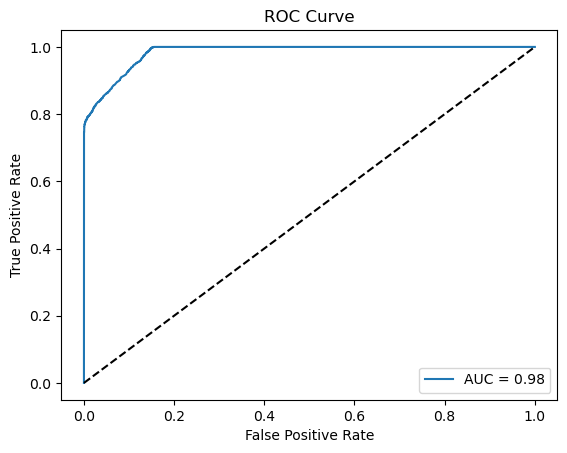

In [129]:
pred = model_xgb2.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## 14. Predict scores 

In [123]:
y_pred_xgb2 = model_xgb2.predict_proba(df[all_features])[:, 1]

In [124]:
df['fraud_scores'] = y_pred_xgb2

C:\Users\itsht\AppData\Local\Temp\ipykernel_21232\488558235.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['fraud_scores'] = y_pred_xgb2


In [125]:
df['fraud_scores'].describe()

count    100500.000000
mean          0.211424
std           0.378967
min           0.001519
25%           0.001519
50%           0.008764
75%           0.279259
max           0.996515
Name: fraud_scores, dtype: float64

In [126]:
df_eval_scores = df.loc[df[target]==-1, ['ID', 'fraud_scores']]

In [127]:
df_eval_scores.shape

(60300, 2)

## 15. Final Model Score merging with Original Evaluation data

In [130]:
df_eval_copy.shape

(60300, 246)

In [131]:
df_output = pd.merge(df_eval_copy, df_eval_scores, left_on = 'ID', right_on ='ID', how='left')

In [132]:
df_output.shape

(60300, 247)

## 16. Output Evaluation with Fraud Scores

In [133]:
df_output.to_csv('Evaluation_with_scores.csv', index=False)

## END